# 📧 Project 2: Spam Detection

## 📌 Project Description
This project focuses on building a **text classification model** to detect **spam vs. ham (not spam)** messages.  
The workflow includes **data preprocessing, vectorization, model training, evaluation, and saving the pipeline** for future use.

---

## 🗂 Dataset
- Labeled dataset with **spam and ham messages**.
- Typical columns: `label` (spam/ham) and `message` (text content).
- Common sources: Kaggle (e.g., [SMS Spam Collection](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)).

---

## 🧹 Preprocessing Steps
1. Convert text to lowercase.
2. Remove punctuation and numbers.
3. Tokenization (split text into words).
4. Optional: remove stopwords (common words like "the", "is", etc.).
5. Vectorization:
   - **CountVectorizer** → counts word occurrences.
   - **TF-IDF Vectorizer** → weighs words by importance.

---

## 🎯 Objective
- Build a classifier to detect **spam messages**.
- Evaluate using **precision, recall, F1-score**.
- Save the model pipeline for future predictions.


# Load Spam Dataset

In [4]:
import numpy as np 
import pandas as pd

df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1','v2']]  # rename columns if dataset has extra columns
df.columns = ['label','message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.value_counts()

label  message                                                                                                                                                                       
ham    Sorry, I'll call later                                                                                                                                                            30
       I cant pick the phone right now. Pls send a message                                                                                                                               12
       Ok...                                                                                                                                                                             10
       Ok.                                                                                                                                                                                4
       Ok                                                         

## Preprocess Text

In [7]:
import re

def clean_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)
df.head()


,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Split Dataset

In [9]:
from sklearn.model_selection import train_test_split

X = df['clean_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Vectorize Text & Train Model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Using TF-IDF + Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),        # convert text to TF-IDF vectors
    ('clf', MultinomialNB())             # train classifier
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[966   0]
 [ 51  98]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



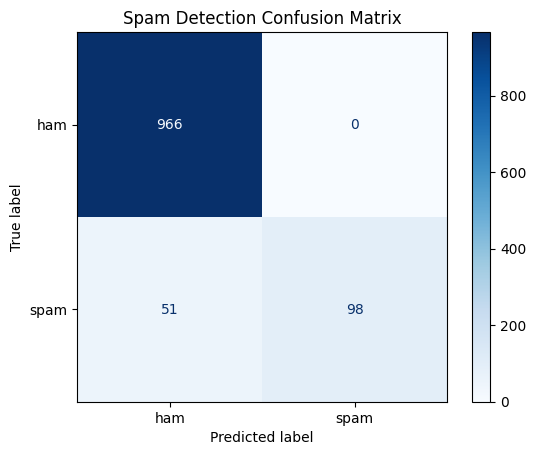

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    y_test,
    display_labels=pipeline.classes_,
    cmap='Blues',
    normalize=None
)

plt.title("Spam Detection Confusion Matrix")
plt.show()


## Save Pipeline for Future Use

In [12]:
import joblib

# Save entire pipeline (vectorizer + model)
joblib.dump(pipeline, "spam_classifier_pipeline.pkl")

# To load later:
# loaded_pipeline = joblib.load("spam_classifier_pipeline.pkl")
# loaded_pipeline.predict(["Free entry! Win a prize now"])


['spam_classifier_pipeline.pkl']

In [13]:
# Example
new_messages = [
    "Congratulations! You've won a $1000 gift card. Call now!",
    "Hey, are we meeting for lunch today?"
]

predictions = pipeline.predict(new_messages)
for msg, label in zip(new_messages, predictions):
    print(f"Message: {msg}\nPredicted label: {label}\n")


Message: Congratulations! You've won a $1000 gift card. Call now!
Predicted label: spam

Message: Hey, are we meeting for lunch today?
Predicted label: ham

